# mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/colab_experiment/RBPJ/webcam-test

Mounted at /content/drive
/content/drive/MyDrive/colab_experiment/RBPJ/webcam-test


In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:

# U0 Y0 V0 Y1 U2 Y2 V2 Y3 U4 Y4 V4…



def yuv2rgb(d):
    Y, U, V = d

    # R = Y + 1.140*V
    # G = Y - 0.395*U - 0.581*V
    # B = Y + 2.032*U

    # Y -= 16;
    # U -= 128;
    # V -= 128;

    R = 1.164 * Y + 1.596 * V
    G = 1.164 * Y - 0.392 * U - 0.813 * V
    B = 1.164 * Y + 2.017 * U

    return [R, G, B]


def convert(frame):

    out = []

    for i in range(0, len(frame), 4):
        data = frame[i:i+4]
        # Y0 = data[0]
        # U0 = data[1]
        # V0 = data[2]
        # Y1 = data[3]
        # U1 = U0
        # V1 = V0

        U0 = data[0]
        Y0 = data[1]
        V0 = data[2]
        U1 = U0
        Y1 = data[3]
        V1 = V0



        out.extend(yuv2rgb([Y0, U0, V0]))
        out.extend(yuv2rgb([Y1, U1, V1]))

    return np.array(out)


frame = np.load('FrameYUV422.npy')

frame = convert(frame)



In [55]:
max(frame), min(frame)

(332.068, -99.881)

In [5]:
# for i in range(3):
#   frame[i::3] = 2 * (frame[i::3] - min(frame[i::3])) / (max(frame[i::3]) - min(frame[i::3])) - 1

# frame = 2 * (frame - min(frame)) / (max(frame) - min(frame)) - 1



frame[1::3] = frame[0::3]
frame[2::3] = frame[0::3]
frame = (frame - min(frame)) / (max(frame) - min(frame))

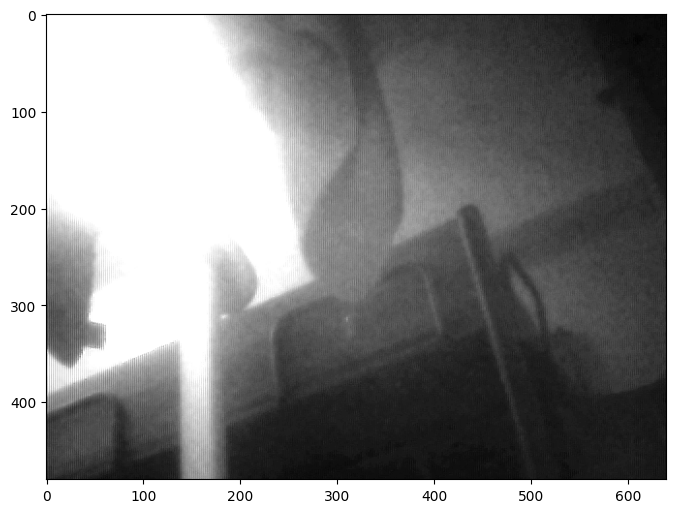

In [6]:

plt.figure(figsize=(8, 12))
# plt.imshow(np.reshape(frame[0::3], (480, 640)))
plt.imshow(np.reshape(frame*3, (480, 640, 3)))

In [25]:
a = np.random.randint(50, size=18)
a


array([ 8, 14,  8, 28, 43, 39, 28, 24, 46, 16, 22, 42, 25,  4, 39, 27, 26,
       15])

In [26]:
a.reshape((3, 3, 2))

array([[[ 8, 14],
        [ 8, 28],
        [43, 39]],

       [[28, 24],
        [46, 16],
        [22, 42]],

       [[25,  4],
        [39, 27],
        [26, 15]]])